In [35]:
import numpy as np
import pandas as pd
import time
import os
from scipy import stats
import matplotlib 
from matplotlib import pyplot as plt

In [36]:
weibull_info = pd.read_csv("../Figures/MCMCFigures/Weibull_MCMC_Params.csv", index_col = 0)
gaussian_info = pd.read_csv("../Figures/MCMCFigures/ProbabilityTable_Fixed_Covariences.csv", index_col = 0)
#wei_bull_probs = pd.read_csv("../Figures/MCMCFigures/Weibull_Probabilities.csv", index_col = 0)
#pd.concat([weibull_info, gaussian_info])
print weibull_info.shape
weibull_info.head()

(53, 9)


,ID,Probability,Gamma,Location,Alpha,Gamma_Error,Location_Error,Alpha_Error,Determinant
0,10518,1.050254e-02,0.548814,0.715189,0.602763,0.230689,0.303886,0.281796,0.000371
1,1174,9.109783e-36,0.417022,0.720324,0.000114,0.264467,0.301296,0.319326,0.000530
2,12073,2.004197e-02,0.435995,0.025926,0.549662,0.271411,0.290108,0.227940,0.000313
3,12840,8.587058e-03,0.550798,0.708148,0.290905,0.242771,0.224148,0.273904,0.000190
4,13362,2.077147e-01,0.967030,0.547232,0.972684,0.274328,0.320001,0.252004,0.000468


In [37]:
print gaussian_info.shape
gaussian_info.head(25)

(53, 7)


,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant
0,10518,0.000087,6.466638,0.433123,0.013783,0.009675,1.774875e-08
1,1174,0.000126,5.257664,0.238005,0.007563,0.005341,1.632020e-09
2,12073,0.000070,4.522320,0.528029,0.016497,0.011818,3.799467e-08
3,12840,0.000048,4.705912,0.611499,0.019386,0.013400,6.748165e-08
4,13362,0.000082,2.080365,0.387756,0.011904,0.008776,1.091486e-08
5,15003,0.000098,6.748090,0.461451,0.014842,0.010386,2.371625e-08
6,15220,0.000089,5.811591,0.366231,0.011645,0.008312,9.356511e-09
7,16588,0.000073,6.629005,0.462531,0.014497,0.010406,2.275697e-08
8,17641,0.000078,5.446672,0.386554,0.012233,0.008563,1.096944e-08
9,18539,0.000090,6.815174,0.522620,0.016754,0.011586,3.767926e-08


In [38]:
#use uniform prior for everything
gamma_range = weibull_info["Gamma"].max() - weibull_info["Gamma"].min()
alpha_range = weibull_info["Alpha"].max() - weibull_info["Alpha"].min()
loc_range = weibull_info["Location"].max() -weibull_info["Location"].min()
sigma_range = gaussian_info["Sigma"].max() - gaussian_info["Sigma"].min()
mean_range = gaussian_info["Mean"].max() - gaussian_info["Mean"].min()
print gamma_range, loc_range, alpha_range, sigma_range, mean_range



0.97863735959 0.955007852949 0.999752917807 0.994386702192 5.57271793049


In [39]:
bayes_factor = np.zeros((gaussian_info.shape[0], 4))

for i in range(gaussian_info.shape[0]):
    #gaussian prop is pron, weibel prob is log prob
    gauss_factor = gaussian_info.loc[i]["Probability"] * (2.*np.pi)*gaussian_info.loc[i]["Determinant"]**0.5 *(1./sigma_range)*(1./mean_range)
    weibull_factor = weibull_info.loc[i]["Probability"] * (2.*np.pi)**(1.5)*weibull_info.loc[i]["Determinant"]**0.5 * (1./gamma_range) * (1./alpha_range)*(1./loc_range)
    
    #print gauss_factor, weibull_factor, weibull_factor/gauss_factor
    bayes_factor[i, :] = gaussian_info.loc[i]["ID"] , gauss_factor, weibull_factor, weibull_factor/gauss_factor
    print weibull_info.loc[i]["ID"],
    #break
bayes_factor_frame = pd.DataFrame(bayes_factor, columns=["ID", "Gauss_Factor", "Weibull_Factor", "Bayes_Factor"])

10518.0 1174.0 12073.0 12840.0 13362.0 15003.0 15220.0 16588.0 17641.0 18539.0 18651.0 19197.0 19591.0 19898.0 20041.0 2008.0 2010.0 20620.0 20972.0 2105.0 2128.0 21872.0 22032.0 22.0 22998.0 23005.0 23975.0 24008.0 24013.0 24017.0 24248.0 24346.0 24453.0 24576.0 24631.0 24705.0 24763.0 24824.0 24930.0 2612.0 3000.0 3898.0 42.0 4641.0 4753.0 5505.0 5958.0 67.0 7341.0 7431.0 8462.0 8582.0 8744.0


In [40]:
print len(np.unique(np.where(bayes_factor_frame == np.inf)[0]))
#bayes_factor_frame[  (bayes_factor_frame["Bayes_Factor"]<1) ]
print bayes_factor_frame["Bayes_Factor"].min(), bayes_factor_frame["Bayes_Factor"].max()
print np.logspace(-4, 8, 13)
print len(weibull_info)
weibull_info[bayes_factor_frame["Bayes_Factor"]>10000000]


2
0.0 6718821142.17
[  1.00000000e-04   1.00000000e-03   1.00000000e-02   1.00000000e-01
   1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03
   1.00000000e+04   1.00000000e+05   1.00000000e+06   1.00000000e+07
   1.00000000e+08]
53


,ID,Probability,Gamma,Location,Alpha,Gamma_Error,Location_Error,Alpha_Error,Determinant
22,22032,0.051697,0.208461,0.481681,0.420538,0.289119,0.273197,0.291855,0.000425
41,3898,0.014770,0.250924,0.046096,0.676816,0.252123,0.283160,0.221160,0.000205
51,8582,0.044059,0.675731,0.044712,0.343304,0.299309,0.205775,0.252201,0.000228


In [41]:
gaussian_info[bayes_factor_frame["Bayes_Factor"]>10000000]
#gaussian_info[gaussian_info["ID"]==2612]["Probability"]


,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant
22,22032,5.460150e-04,1.913805,0.056899,0.001820,0.001270,5.340215e-12
41,3898,8.517272e-08,5.448289,0.994400,0.024493,0.017271,1.788412e-07
51,8582,4.946970e-01,1.996377,0.000064,0.000002,0.000001,8.866040e-24


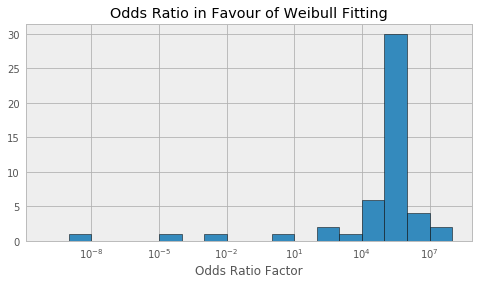

In [47]:
pd.options.display.mpl_style = 'default'
bayes_factor_frame.hist("Bayes_Factor", bins = np.logspace(-10, 8, 19), edgecolor = "black", figsize= (8,4))
plt.xscale("log")
plt.title("Odds Ratio in Favour of Weibull Fitting")
plt.xlabel("Odds Ratio Factor")
plt.savefig("../Figures/MCMCFigures/Bayes_Factor_Distribution.png")
plt.show()


In [28]:
#bayes_factor_frame
weibull_info[ (bayes_factor_frame["Bayes_Factor"]<1) ]

,ID,Probability,Gamma,Location,Alpha,Gamma_Error,Location_Error,Alpha_Error,Determinant
1,1174,9.109783e-36,0.417022,0.720324,0.000114,0.264467,0.301296,0.319326,0.000530
15,2008,3.317174e-11,0.848818,0.178896,0.054363,0.188376,0.285829,0.333179,0.000311
20,2128,1.577334e-01,0.588131,0.897714,0.891531,0.273517,0.244730,0.205499,0.000185
29,24017,1.451740e-16,0.863760,0.284906,0.073256,0.284182,0.281449,0.282624,0.000508
37,24824,3.346144e-10,0.944497,0.464098,0.192795,0.249271,0.338602,0.270323,0.000507
39,2612,8.966934e-02,0.546889,0.797899,0.820402,0.255359,0.232032,0.314846,0.000319


In [30]:
gaussian_info[ (bayes_factor_frame["Bayes_Factor"]<1) ]

,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant
1,1174,0.000126,5.257664,0.238005,0.007563,0.005341,1.632020e-09
15,2008,0.000535,2.746049,0.464412,0.016243,0.011352,3.399939e-08
20,2128,inf,2.228738,0.000034,inf,inf,inf
29,24017,0.000044,5.283116,0.631399,0.020144,0.014307,8.304516e-08
37,24824,0.000057,5.863755,0.672335,0.020828,0.014970,9.694569e-08
39,2612,inf,2.759919,0.000013,inf,inf,inf


In [33]:
bayes_factor_frame[ (bayes_factor_frame["Bayes_Factor"]<0.01) ]

,ID,Gauss_Factor,Weibull_Factor,Bayes_Factor
1,1174.0,5.774119e-09,3.535177e-36,6.122452e-28
15,2008.0,1.117792e-07,9.862403e-12,8.823111e-05
20,2128.0,inf,3.617183e-02,0.000000e+00
29,24017.0,1.428734e-08,5.516410e-17,3.861047e-09
37,24824.0,2.011058e-08,1.270267e-10,6.316412e-03
39,2612.0,inf,2.699398e-02,0.000000e+00


In [34]:
gaussian_info[ gaussian_info["ID"]== 24763]
#load this data

,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant
36,24763,0.00007,5.863164,0.539008,0.017113,0.011756,4.047305e-08
